In [42]:
import matplotlib.pyplot as plt
import numpy as np
from better_regressions import auto_angle, auto_linear
from sklearn.base import clone
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split


## I: linear with a heavy-tailed distribution of $X, w$ and $\varepsilon$

$$ X \sim \text{Cauchy}(0, 1) $$
$$ y = X w^T + \varepsilon,\quad \varepsilon \sim \text{Cauchy}(0, 1),\quad w \sim \text{Cauchy}(0, I) $$






model_est = Linear(alpha='bayes', better_bias=True)
model = AutoScaler(estimator=model_est, val_size=0.3, random_state=42)
# Selected x_method='standard', y_method='standard' with score: 4.958818
---
Ridge(alpha=1e-06)
---
model_est = Smooth(method='angle', lr=0.5, max_epochs=200, n_points=200, use_early_stopping=False, n_breakpoints=1)
model = AutoScaler(estimator=model_est, val_size=0.3, random_state=42)
# Selected x_method='power', y_method='power' with score: 4.570597
---
model_est = Smooth(method='angle', lr=0.5, max_epochs=1000, n_points=200, use_early_stopping=False, n_breakpoints=2)
model = AutoScaler(estimator=model_est, val_size=0.3, random_state=42)
# Selected x_method='power', y_method='power' with score: 19.804760
---


            Model Performance             
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Model           ┃ Train MSE ┃ Test MSE ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩
│ AutoLinear      │ 66.7741   │ 53.6457  │
│ sklearn's Ridge │ 66.1996   │ 53.7162  │
│ AutoAngle(1)    │ 66.2747   │ 53.5261  │
│ AutoAngle(2)    │ 60.4926   │ 45.9021  │
└─────────────────┴───────────┴──────────┘

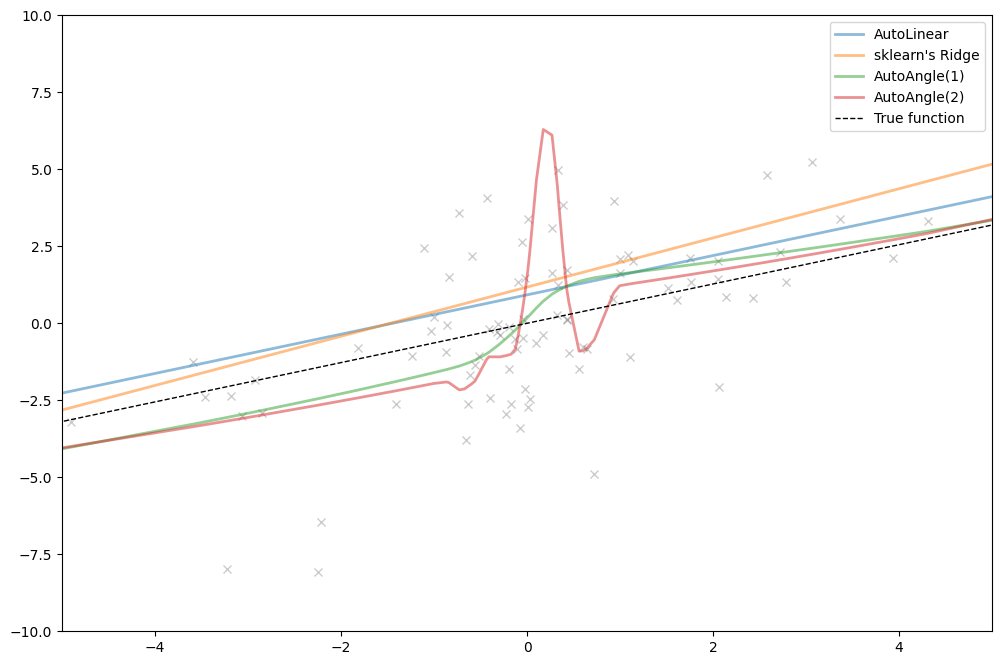

In [43]:
np.random.seed(42)
N = 100
X = np.clip(np.random.standard_cauchy((N, 1)), -10, 10)
w = np.random.standard_cauchy((1, 1))
eps = np.clip(np.random.standard_cauchy((N,)), -50, 50)
y = (X @ w).ravel() + eps
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

models = {
    "AutoLinear": auto_linear(),
    "sklearn's Ridge": Ridge(alpha=1e-6),
    "AutoAngle(1)": auto_angle(n_breakpoints=1),
    "AutoAngle(2)": auto_angle(n_breakpoints=2, max_epochs=1000),
}

from rich.console import Console
from rich.table import Table

plt.figure(figsize=(12, 8))
plt.plot(X, y, "kx", alpha=0.2)

results = []
for model_name, model in models.items():
    model = clone(model)
    model.fit(X, y)
    print(repr(model))
    print("---")
    y_pred = model.predict(X)
    argsort = np.argsort(X.ravel())
    plt.plot(X.ravel()[argsort], y_pred[argsort], label=model_name, lw=2, alpha=0.5)
    train_mse = np.mean((y_train - model.predict(X_train)) ** 2)
    test_mse = np.mean((y_test - model.predict(X_test)) ** 2)
    results.append((model_name, train_mse, test_mse))
# Plot the true function
x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_true = (x_plot @ w).ravel()
plt.plot(x_plot, y_true, "--", color="k", label="True function", linewidth=1)


table = Table(title="Model Performance")
table.add_column("Model", style="cyan")
table.add_column("Train MSE", style="green")
table.add_column("Test MSE", style="yellow")

for model_name, train_mse, test_mse in results:
    table.add_row(model_name, f"{train_mse:.4f}", f"{test_mse:.4f}")

console = Console()
console.print(table)

plt.xlim(-5, 5)
plt.ylim(-10, 10)
plt.legend()
plt.show()


## II: exponential features with underlying linear model

$$ Z \sim \mathcal{N}(0, 1) $$
$$ X = \exp(Z) $$
$$ y = Z w^T + \varepsilon,\quad \varepsilon \sim \mathcal{N}(0, 1),\quad w \sim \mathcal{N}(0, 1) $$





model_est = Linear(alpha='bayes', better_bias=True)
model = AutoScaler(estimator=model_est, val_size=0.3, random_state=42)
# Selected x_method='quantile-normal', y_method='quantile-normal' with score: 0.970825
---
Ridge(alpha=1e-06)
---
model_est = Smooth(method='angle', lr=0.5, max_epochs=200, n_points=200, use_early_stopping=False, n_breakpoints=1)
model = AutoScaler(estimator=model_est, val_size=0.3, random_state=42)
# Selected x_method='standard', y_method='standard' with score: 0.966970
---
model_est = Smooth(method='angle', lr=0.5, max_epochs=1000, n_points=200, use_early_stopping=False, n_breakpoints=2)
model = AutoScaler(estimator=model_est, val_size=0.3, random_state=42)
# Selected x_method='standard', y_method='standard' with score: 0.965521
---


            Model Performance             
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Model           ┃ Train MSE ┃ Test MSE ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩
│ AutoLinear      │ 0.9968    │ 0.9947   │
│ sklearn's Ridge │ 1.1056    │ 1.2248   │
│ AutoAngle(1)    │ 1.0039    │ 0.9788   │
│ AutoAngle(2)    │ 0.9944    │ 0.9798   │
└─────────────────┴───────────┴──────────┘

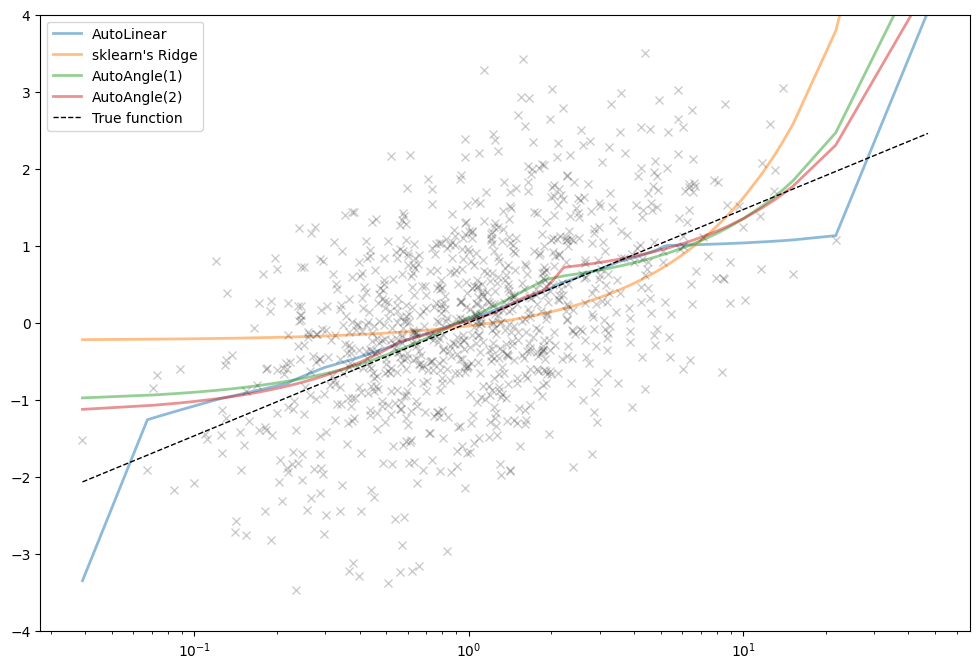

In [44]:
np.random.seed(42)
N = 1000
Z = np.random.randn(N, 1)
X = np.exp(Z)
y = (Z @ w).ravel() + np.random.randn(N)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(12, 8))
results = []
for model_name, model in models.items():
    model = clone(model)
    model.fit(X, y)
    print(repr(model))
    print("---")
    y_pred = model.predict(X)
    argsort = np.argsort(X.ravel())
    plt.plot(X.ravel()[argsort], y_pred[argsort], label=model_name, lw=2, alpha=0.5)
    train_mse = np.mean((y_train - model.predict(X_train)) ** 2)
    test_mse = np.mean((y_test - model.predict(X_test)) ** 2)
    results.append((model_name, train_mse, test_mse))

plt.plot(X, y, "kx", alpha=0.2)

# Plot the true function
x_plot = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
z_plot = np.log(x_plot)  # Convert back to Z space
y_true = (z_plot @ w).ravel()
plt.plot(x_plot, y_true, "--", color="k", label="True function", linewidth=1)

table = Table(title="Model Performance")
table.add_column("Model", style="cyan")
table.add_column("Train MSE", style="green")
table.add_column("Test MSE", style="yellow")

for model_name, train_mse, test_mse in results:
    table.add_row(model_name, f"{train_mse:.4f}", f"{test_mse:.4f}")

console = Console()
console.print(table)

plt.xscale("log")
plt.ylim(-4, 4)
plt.legend()
plt.show()


# III: non-monotonic relationship 

$$ X \sim \mathcal{N}(0, 1) $$
$$ y = \sin(\pi X) + \varepsilon,\quad \varepsilon \sim \mathcal{N}(0, 1) $$

model_est = Linear(alpha='bayes', better_bias=True)
model = AutoScaler(estimator=model_est, val_size=0.3, random_state=42)
# Selected x_method='standard', y_method='standard' with score: 1.426337
---
Ridge(alpha=1e-06)
---
model_est = Smooth(method='angle', lr=0.5, max_epochs=200, n_points=200, use_early_stopping=False, n_breakpoints=1)
model = AutoScaler(estimator=model_est, val_size=0.3, random_state=42)
# Selected x_method='power', y_method='power' with score: 1.214675
---
model_est = Smooth(method='angle', lr=0.5, max_epochs=1000, n_points=200, use_early_stopping=False, n_breakpoints=2)
model = AutoScaler(estimator=model_est, val_size=0.3, random_state=42)
# Selected x_method='standard', y_method='standard' with score: 1.212115
---


            Model Performance             
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Model           ┃ Train MSE ┃ Test MSE ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩
│ AutoLinear      │ 1.2704    │ 1.6049   │
│ sklearn's Ridge │ 1.2709    │ 1.5846   │
│ AutoAngle(1)    │ 1.0944    │ 1.2126   │
│ AutoAngle(2)    │ 1.0576    │ 1.1929   │
└─────────────────┴───────────┴──────────┘

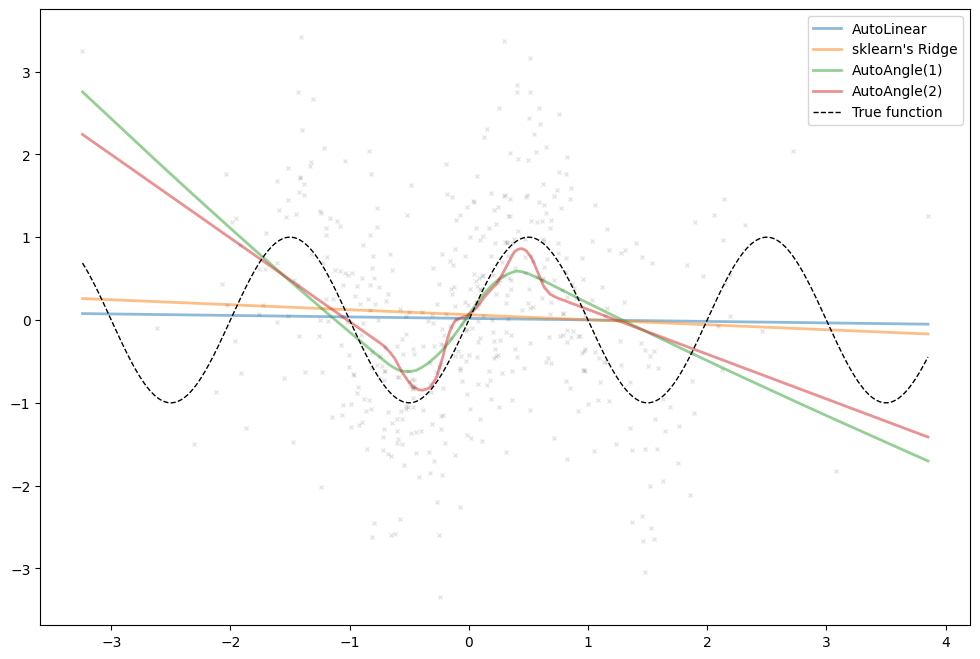

In [45]:
np.random.seed(42)
N = 500
X = np.random.randn(N, 1)
y = np.sin(np.pi * X).ravel() + 1.0 * np.random.randn(N, 1).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


plt.figure(figsize=(12, 8))
results = []
for model_name, model in models.items():
    model = clone(model)
    model.fit(X, y)
    print(repr(model))
    print("---")
    y_pred = model.predict(X)
    argsort = np.argsort(X.ravel())
    plt.plot(X.ravel()[argsort], y_pred[argsort], label=model_name, lw=2, alpha=0.5)
    train_mse = np.mean((y_train - model.predict(X_train)) ** 2)
    test_mse = np.mean((y_test - model.predict(X_test)) ** 2)
    results.append((model_name, train_mse, test_mse))

plt.plot(X, y, "kx", alpha=0.1, ms=3)

# Plot the true function
x_plot = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_true = np.sin(np.pi * x_plot).ravel()
plt.plot(x_plot, y_true, "--", color="k", label="True function", linewidth=1)

table = Table(title="Model Performance")
table.add_column("Model", style="cyan")
table.add_column("Train MSE", style="green")
table.add_column("Test MSE", style="yellow")

for model_name, train_mse, test_mse in results:
    table.add_row(model_name, f"{train_mse:.4f}", f"{test_mse:.4f}")

console = Console()
console.print(table)

plt.legend()
plt.show()
